In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import layers
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [17]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [18]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [5]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-04-05 17:57:04.419943: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-05 17:57:04.420563: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])


In [7]:
x_val = x_train[:10000]

partial_x_train = x_train[10000:]

y_val = y_train[:10000]

partial_y_train = y_train[10000:]

In [23]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)


Epoch 1/20
30/30 [==============================] - 1s 35ms/step - loss: 1.8921e-04 - accuracy: 1.0000 - val_loss: 1.1245 - val_accuracy: 0.8579
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 1.6712e-04 - accuracy: 1.0000 - val_loss: 1.1722 - val_accuracy: 0.8566
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 1.2032 - val_accuracy: 0.8566
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 9.6324e-05 - accuracy: 1.0000 - val_loss: 1.2166 - val_accuracy: 0.8561
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 8.2847e-05 - accuracy: 1.0000 - val_loss: 1.2445 - val_accuracy: 0.8555
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 6.4132e-05 - accuracy: 1.0000 - val_loss: 1.3027 - val_accuracy: 0.8569
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 1.3336 - val_accuracy: 

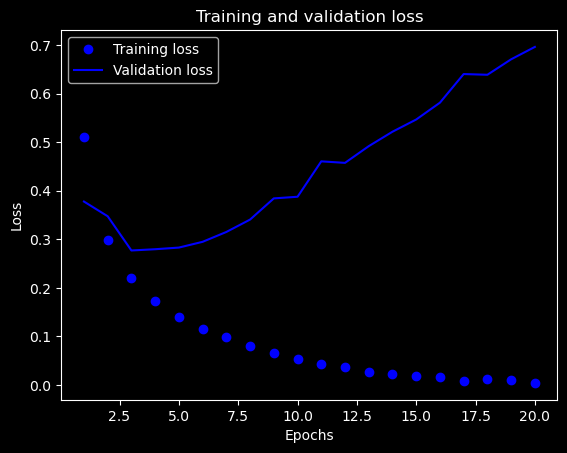

In [12]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]


epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


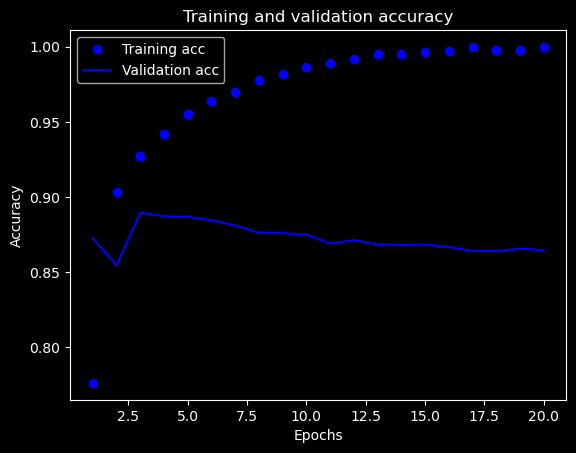

In [19]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()
